<center><h1> Airlines Customer Satisfaction <h1/>

## Import Librairies

In [1]:
#!python -m pip install yellowbrick

In [2]:
## Import Librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

### Data:

* **Gender**: Gender of the passengers (Female, Male)

* **Customer Type**: The customer type (Loyal customer, disloyal customer)

* **Age**: The actual age of the passengers

* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance**: The flight distance of this journey

* **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

* **Inflight service**: Satisfaction level of inflight service

* **Cleanliness**: Satisfaction level of Cleanliness

* **Departure Delay in Minutes**: Minutes delayed when departure

* **Arrival Delay in Minutes**: Minutes delayed when Arrival

* **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
#read the data
df = pd.read_csv("data.csv")

In [4]:
#show first 5 rows
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
#check the shape of the data
df.shape

(103904, 23)

In [6]:
#general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Get some insights about the data

In [7]:
#Get summary information about quantitative features by calling the "describe" method
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Based on this output, we can make the following interpretations about the Baggage handling feature:

* **1. Central tendency:**  The mean Baggage handling satisfaction score is 3.63, which indicates that the overall level of Baggage handling customer satisfaction is relatively high. The median satisfaction score (50th percentile) is also 4, which further supports this interpretation.

* **2. Dispersion:** The standard deviation of the Baggage handling customer satisfaction score is 1.18, which indicates that the values in the data set are relatively close to the mean and are not dispersed over a wide range. 

* **3. Outliers:** There are no extreme outliers in this data set, as the minimum and maximum baggage handling customer satisfaction score(1 and 5) are both within a reasonable range.

* **4. Skewness:** The distribution of baggage handling customer satisfaction scores is relatively symmetrical, as the mean and median values are both close to each other. This suggests that the data are evenly distributed around the central tendency.

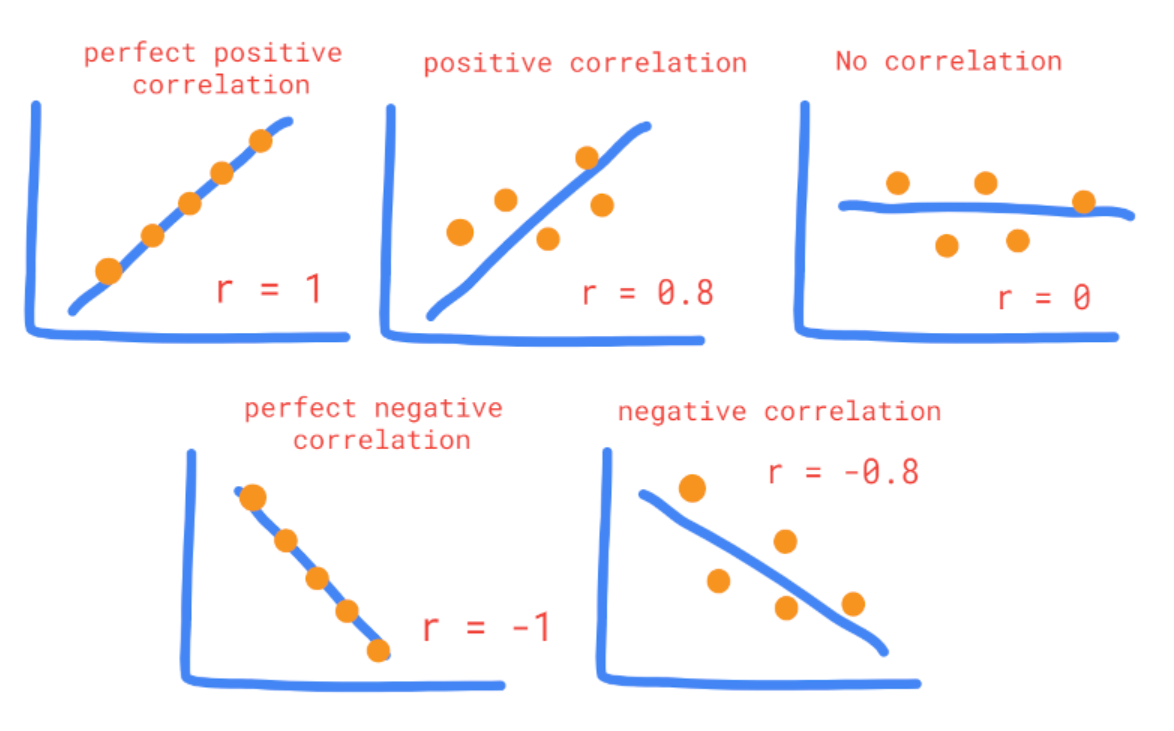

In [8]:
#Let's check the correlation between the different feature
Image(filename="images/corr.png")

**Correlation is a statistical measure that reflects the strength and direction of the relationship between two variables. It helps us understand how the value of one variable is related to the value of another variable.**

In [9]:
corr_matrix = df[["Departure Delay in Minutes","Arrival Delay in Minutes"]].corr()
corr_matrix

,Departure Delay in Minutes,Arrival Delay in Minutes
Departure Delay in Minutes,1.000000,0.965481
Arrival Delay in Minutes,0.965481,1.000000


Based on that we can conclude that the features Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated, so we can drop one of them.

<AxesSubplot:xlabel='Inflight entertainment', ylabel='Flight Distance'>

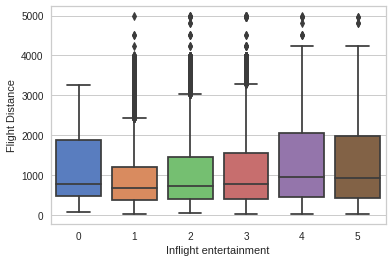

In [10]:
#let's check the relationship between the Flight Distance and Inflight entertainment features
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "muted", data = df)

* We have above a box plot with 5 boxes, one for each category of the categorical variable Inflight entertainment.

* The box represents the interquartile range (IQR) of the data, which is the range between the 25th and 75th percentiles. 
* The line in the middle of the box represents the median of the data. 
* The whiskers represent the minimum and maximum values of the data, except for outliers, which are plotted as individual points.

The following pattern can be seen: **the more distance a passenger travels , the more they are satisfied** with the **entertainment** in flight.



To interpret the box plot, you can compare the distribution of the numerical variable within each group. For example, if the box for the "new" customers is higher than the box for the "repeat" customers, it indicates that the "new" customers tend to have higher satisfaction scores. You can also compare the medians and the IQRs to get a sense of the overall patterns in the data.


<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

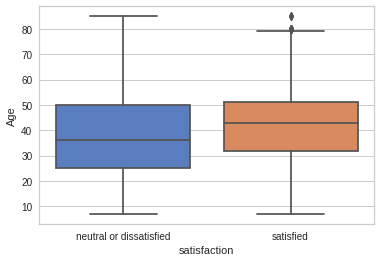

In [11]:
#let's check the relationship between the age feature and the target
sns.boxplot(x = "satisfaction", y = "Age", palette = "muted", data = df)

In [58]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [12]:
#Age range for satisfied customers
df["Age"][df["satisfaction"]=="satisfied"].describe()

count    45025.000000
mean        41.750583
std         12.767833
min          7.000000
25%         32.000000
50%         43.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

In [13]:
#Age range for dissatisfied customers
df["Age"][df["satisfaction"]=="neutral or dissatisfied"].describe()

count    58879.000000
mean        37.566688
std         16.459825
min          7.000000
25%         25.000000
50%         36.000000
75%         50.000000
max         85.000000
Name: Age, dtype: float64

From this box diagram, we can conclude that most of the airline's **satisfied customers** are **between the ages of 30 and 50** (their average age is slightly over 40). **The age range of neutral or dissatisfied customers** is slightly smaller **(from 25 to 40 years old)**.

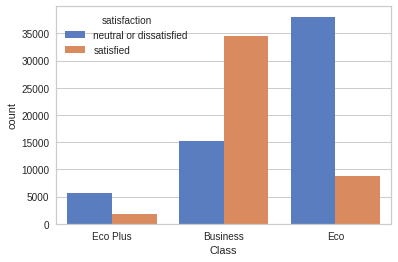

In [14]:
#relationship between the class and satisfaction
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "muted", data = df)
plt.show()

This chart is very revealing. You can see that most of the **passengers** who flew in **economy plus or economy class** were **dissatisfied** with the flight, and those who were lucky enough to fly in **business class** were **satisfied**.

**Try to find some other patterns in the data by yourself!!**

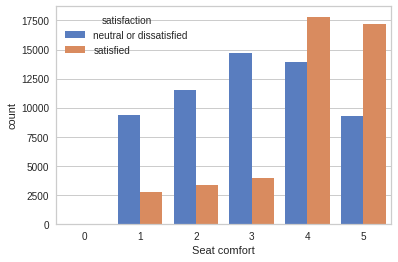

In [15]:
#Relationship between seat confort and flight satisfaction
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "muted", data = df)
plt.show()

From the graph above, we can conclude the following: most **passengers** who **rated the comfort of the seats** at **4 and 5 points** out of 5 were **satisfied** with the flight.

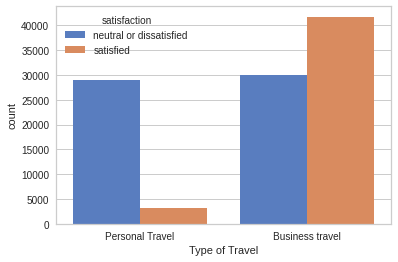

In [16]:
#let's check the relationship between the type of travel of  feature and the target
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', palette = "muted", data = df)
plt.show()

From the graph above, we can conclude the following: most **passengers** who were in a **personal travel** were **neutral or dissatisfied** and those who were in a **Business travel** were **satisfied**.

In [17]:
X = df.drop("satisfaction",axis=1)
y = df["satisfaction"]

In [18]:
# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#check if there is any duplicates
X_train.duplicated().sum()

0

In [20]:
#check if there is any missing values
X_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             240
dtype: int64

In [21]:
#Impute the missing values by the median value
X_train["Arrival Delay in Minutes"].fillna(X_train["Arrival Delay in Minutes"].median(),inplace=True)

In [22]:
#check the imputation
X_train.isnull().sum().sum()

0

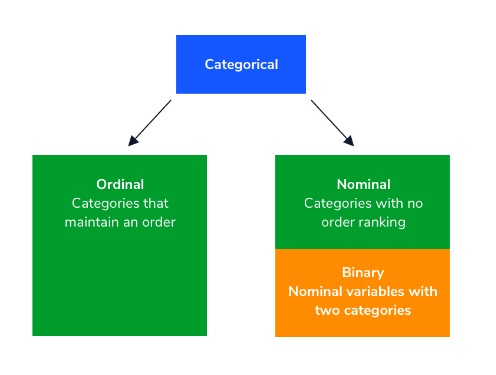

In [23]:
#Transform the categorical features 
Image(filename="images/6.png")

In [24]:
#select categorical features 
categ_features= X_train.select_dtypes(include=['object']).columns.tolist() 

In [25]:
categ_features

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [26]:
X_train.Class.value_counts()

Business    39619
Eco         37476
Eco Plus     6028
Name: Class, dtype: int64

In [27]:
X_train["Customer Type"].value_counts()

Loyal Customer       67915
disloyal Customer    15208
Name: Customer Type, dtype: int64

In [28]:
#Simple imputation
encode_dict = {  # Encoding dictionary
    'disloyal Customer':0,'Loyal Customer':1}
X_train['Customer Type'] = X_train['Customer Type'].map(encode_dict)

In [29]:
encode_dic= {  
    'Male':0,'Female':1}
X_train['Gender'] = X_train['Gender'].map(encode_dic)

In [30]:
#Ordinal encoding
ordinalencoder = OrdinalEncoder(dtype=np.int32,categories=[['Eco', 'Eco Plus', 'Business']])
X_train['Class'] = ordinalencoder.fit_transform(X_train[['Class']])

In [31]:
#one hot encoding
dummy_cols = ['Type of Travel']
X_train = pd.get_dummies(X_train, columns=dummy_cols)

In [32]:
X_train.head(3)

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel
38476,0,1,39,0,292,2,1,1,1,2,...,4,3,2,3,4,2,0,0.0,1,0
11025,0,1,18,0,544,2,5,4,2,4,...,4,4,2,2,2,4,58,30.0,0,1
87002,1,1,24,1,196,4,2,4,4,1,...,1,5,4,1,4,1,46,44.0,0,1


In [33]:
#Scale numerical features
cols_to_scale = df.select_dtypes(include=np.number).columns.tolist()

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
#fit the scaler to the train data and transform its numerical features 
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [36]:
X_train.head(3)

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel
38476,0,1,0.410256,0,0.052706,0.4,0.2,0.2,0.2,0.4,...,0.8,0.6,0.25,0.50,0.8,0.4,0.000000,0.000000,1,0
11025,0,1,0.141026,0,0.103595,0.4,1.0,0.8,0.4,0.8,...,0.8,0.8,0.25,0.25,0.4,0.8,0.036432,0.018939,0,1
87002,1,1,0.217949,1,0.033320,0.8,0.4,0.8,0.8,0.2,...,0.2,1.0,0.75,0.00,0.8,0.2,0.028894,0.027778,0,1


In [37]:
#Apply transformations to test set
X_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             70
dtype: int64

In [38]:
#Impute the missing values by the median value
X_test["Arrival Delay in Minutes"].fillna(X_test["Arrival Delay in Minutes"].median(),inplace=True)

In [39]:
#Apply transformations to the test set
encode_dict = {  # Encoding dictionary
    'disloyal Customer':0,'Loyal Customer':1}
X_test['Customer Type'] = X_test['Customer Type'].map(encode_dict)
encode_dict = {  
    'Male':0,'Female':1}
X_test['Gender'] = X_test['Gender'].map(encode_dict)
X_test['Class'] = ordinalencoder.transform(X_test[['Class']])
X_test = pd.get_dummies(X_test, columns=dummy_cols)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [40]:
X_test.head(2)

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel
70655,0,1,0.410256,2,0.720315,0.6,0.6,0.8,0.6,1.0,...,0.8,0.8,0.75,0.75,0.8,0.6,0.0,0.0,1,0
56114,1,1,0.769231,0,0.412157,0.4,0.8,0.4,0.6,1.0,...,0.4,0.4,0.25,1.00,0.4,1.0,0.0,0.0,0,1


In [41]:
#Transform the target column (satisfied:1,neutral or dissatisfied:0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
y_train= le.fit_transform(y_train)

In [43]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [44]:
y_test = le.transform(y_test)

## Fit the data to a Logistic Regression Model

Logistic Regression : It is used in classification use cases where we want to predict a discrete target ( for example whether something is true or false). It catches the relationship between the target variable (satisfaction column in our case ) and the independant features ( customer type , age .. ) by fitting our data with the Sigmoid function.

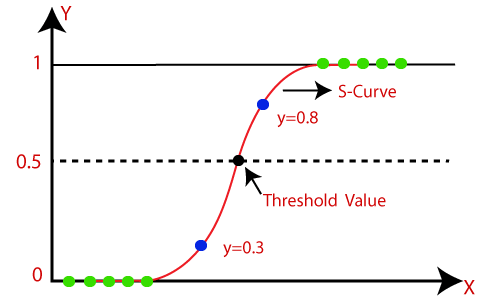

In [45]:
Image(filename="images/log.png")

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="sag")
lr.fit(X_train,y_train)

LogisticRegression(solver='sag')

# Model evaluation:

In [59]:
# ROC-AUC

In [47]:
#predict on test data
predicted = lr.predict(X_test)

x_pred = X_test.copy()
x_pred["predicted"]=predicted
x_pred["real_label"]=y_test

In [63]:
x_pred.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,predicted,real_label
70655,0,1,0.410256,2,0.720315,0.6,0.6,0.8,0.6,1.0,...,0.75,0.75,0.8,0.6,0.000000,0.000000,1,0,1,1
56114,1,1,0.769231,0,0.412157,0.4,0.8,0.4,0.6,1.0,...,0.25,1.00,0.4,1.0,0.000000,0.000000,0,1,0,0
95351,0,1,0.205128,0,0.167811,0.4,0.6,0.4,0.6,0.2,...,0.75,0.25,0.8,0.2,0.018844,0.020202,0,1,0,0
32181,1,1,0.679487,2,0.076333,0.2,1.0,1.0,1.0,0.2,...,0.00,0.00,0.2,0.2,0.003769,0.000000,1,0,0,0
5214,0,1,0.282051,1,0.038570,1.0,1.0,1.0,1.0,1.0,...,1.00,0.50,0.4,1.0,0.000000,0.000000,1,0,1,1


### **Evaluation metrics:**
- **Accuracy:** 

In [64]:
from sklearn.metrics import accuracy_score

print("train accuracy : ", accuracy_score(y_train,lr.predict(X_train)))
print("test accuracy : ", accuracy_score(y_test,predicted))

train accuracy :  0.8746676611768103
test accuracy :  0.8756075261055772


- **Precision:** Precision is one indicator of the quality of the positive predictions made by the model. Of all the positive predictions I made, how many of them are truly positive?

- In our case,how many customers are **really satisfied** of **all predicted satisfied**? 

Precision is defined as follows:

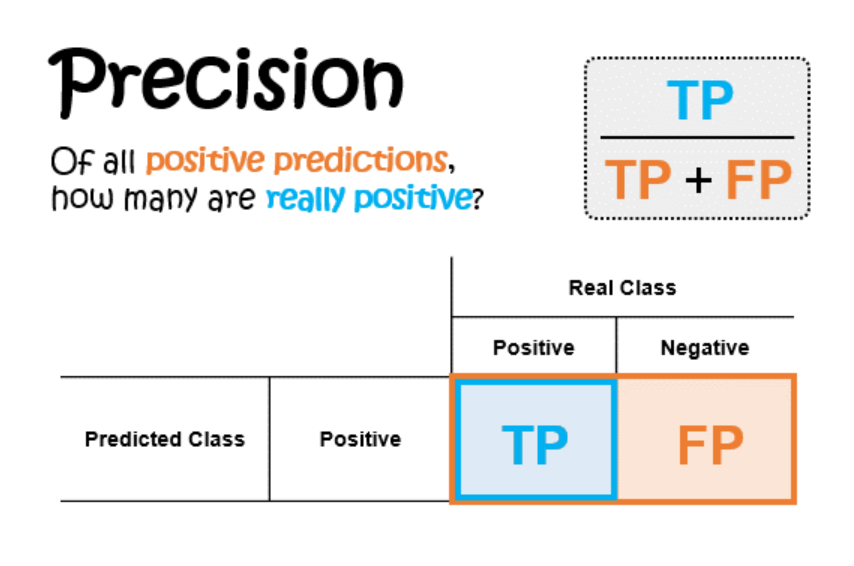

In [50]:
Image(filename="images/presic.png")

* **Recall:** Recall, a commonly used performance metric for classification models, is the fraction of positives that are correctly classified,Of all the actual positive examples out there, how many of them did I correctly predict to be positive?
* In our case,of **all the actual satisfied customers** how many of them the model **predicted correctly**?

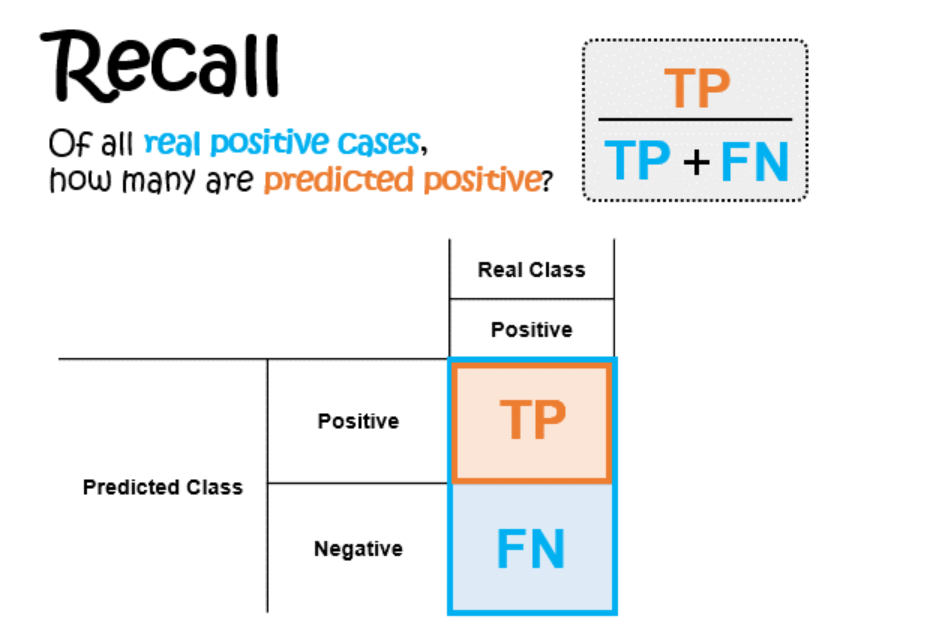

In [51]:
Image(filename="images/rec.png")

**F1-score:** To evaluate model performance comprehensively, we should examine both precision and recall. The F1 score serves as a helpful metric that considers both of them.

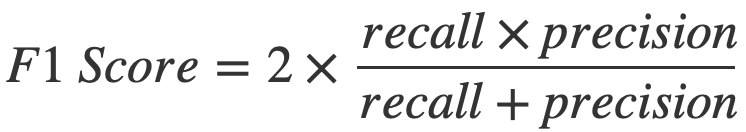

In [52]:
Image(filename="images/F1-Score.png")

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

print('Classification report:\n', classification_report(y_test, predicted))
print('Share of Unsatisfied customers in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     11770
           1       0.87      0.84      0.85      9011

    accuracy                           0.88     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

Share of Unsatisfied customers in Test Data: 0.5664


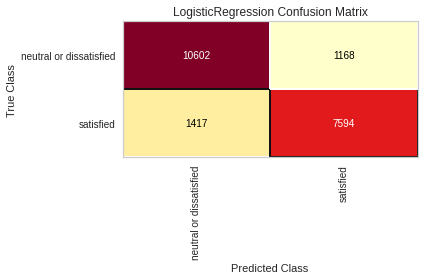

In [57]:
from yellowbrick.classifier import ConfusionMatrix
conf_mat = ConfusionMatrix(lr,classes=["neutral or dissatisfied","satisfied"])
conf_mat.score(X_test, y_test)
conf_mat.show();

==> The best evaluation metric will depend on the specific goals of your classification task. If you are trying to **minimize the number of false negatives** (e.g., **you don't want to miss any dissatisfied customers**), you may want to focus on metrics like **recall**.If you are more concerned with **minimizing the number of false positives** (e.g., **you don't want to label any satisfied customers as dissatisfied**), you may want to focus on metrics like **precision**.